## Get the data

In [2]:
import sqlalchemy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import macrosynergy.management as msm
import macrosynergy.panel as msp
import qstools.indicators as qsi

import warnings
warnings.simplefilter('ignore')

In [10]:
cids_dmca = ['AUD', 'CAD', 'CHF', 'EUR', 'GBP', 'JPY', 'NOK', 'NZD', 'SEK', 'USD']  # DM currency areas
cids_dmec = ['DEM', 'ESP', 'FRF', 'ITL', 'NLG']  # DM euro area countries
cids_latm = ['ARS', 'BRL', 'COP', 'CLP', 'MXN', 'PEN']  # Latam countries
cids_emea = ['HUF', 'ILS', 'PLN', 'RON', 'RUB', 'TRY', 'ZAR']  # EMEA countries
cids_emas = ['CNY', 'HKD', 'IDR', 'INR', 'KRW', 'MYR', 'PHP', 'SGD', 'THB', 'TWD']  # EM Asia countries
cids_dm = cids_dmca + cids_dmec
cids_em = cids_latm + cids_emea + cids_emas
cids = sorted(cids_dm + cids_em)

In [21]:
from_DB = True
path_to_feather = "..//..//data//feathers//"

main = ['BXBGDPRATIO_NSA_12MMA', 'BXBGDPRATIO_NSA_12MMA_D1M1ML3', 'CABGDPRATIO_NSA_12MMA', 
        'MTBGDPRATIO_NSA_12MMA', 'MTBGDPRATIO_NSA_12MMA_D1M1ML3', 'NFDIGDPRATIO_NSA_12MMA']
econ = ['REER_NSA_P1M60ML1']  # economic context
mark = ['FXCRR_NSA', 'FXXR_NSA']  # market links

xcats = main + econ + mark

if from_DB:
    dbi = qsi.DownloadQuantamentalIndicators(username="rsueppel",
                                             host="qs-db.cpdsgdta9z0z.eu-west-2.rds.amazonaws.com",
                                             password="l3oT7^WerjY#O!9EGqvL",
                                             database="qs_jpm_point_time")
    dfd = dbi.get_xcat(cross_section = cids, xcat = xcats).reset_index(drop=True)    
    dfd.to_feather(f'{path_to_feather}dfd_cabgdpratio.ftr')   
else:
    dfd = pd.read_feather(f'{path_to_feather}dfd_cabgdpratio.ftr')

In [23]:
dfd[['cid', 'xcat']] = dfd['ticker'].str.split('_', 1, expand=True)
dfd['real_date'] = pd.to_datetime(dfd['real_date'])

In [24]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533855 entries, 0 to 1533854
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   ticker     1533855 non-null  object        
 1   real_date  1533855 non-null  datetime64[ns]
 2   value      1533855 non-null  float64       
 3   grading    1533855 non-null  object        
 4   eop_lag    1533855 non-null  int64         
 5   mop_lag    1533855 non-null  int64         
 6   cid        1533855 non-null  object        
 7   xcat       1533855 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 93.6+ MB


## Labels, definitions, notes and tickers

In [33]:
docs = {}

In [34]:
docs['CABGDPRATIO'] = {
    'Label' : 
    'Current account-to-GDP ratio',
    'Definition': 
    'Ratio of external current account to nominal GDP in %, with latest month(s) predicted by customs trade balance reports',
    'Notes': 
    '...' + 
    '...',
    'Tickers':
    ['CABGDPRATIO_NSA_12MMA']
}

In [36]:
docs['MTBGDPRATIO'] = {
    'Label' : 
    'Merchandise trade balance-to-GDP ratio',
    'Definition': 
    'Ratio of external merchandise trade balance to nominal GDP in %',
    'Notes': 
    '...' + 
    '...',
    'Tickers':
    ['MTBGDPRATIO_NSA_12MMA', 'MTBGDPRATIO_NSA_12MMA_D1M1ML3']
}

In [37]:
docs['NFDIGDPRATIO'] = {
    'Label' : 
    'Net foreign direct investment-to-GDP ratio',
    'Definition': 
    'Ratio of net foreign direct investment to nominal GDP in %',
    'Notes': 
    '...' + 
    '...',
    'Tickers':
    ['NFDIGDPRATIO_NSA_12MMA']
}

In [86]:
docs['BXBGDPRATIO'] = {
    'Label' : 
    'Basic external balance-to-GDP ratio',
    'Definition': 
    'External current account and net FDI (inflows) as % of GDP',
    'Notes': 
    'This indicators is meant to represent the more stable external flows.' + 
    '...',
    'Tickers':
    ['BXBGDPRATIO_NSA_12MMA', 'BXBGDPRATIO_NSA_12MMA_D1M1ML3']
}

## Availability and quality

In [18]:
cids_exp = sorted(list(set(cids) - set(cids_dmec + ['ARS', 'HKD'])))
msm.missing_in_df(dfd, xcats=xcats, cids=cids_exp)

Missing xcats across df:  set()
Missing cids for CABGDPRATIO_NSA_12MMA:  set()
Missing cids for FXCRR_NSA:  {'USD'}
Missing cids for FXXR_NSA:  {'USD'}
Missing cids for MTBGDPRATIO_NSA_12MMA:  set()


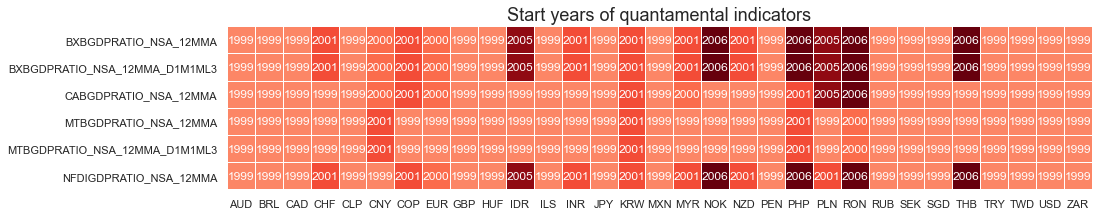

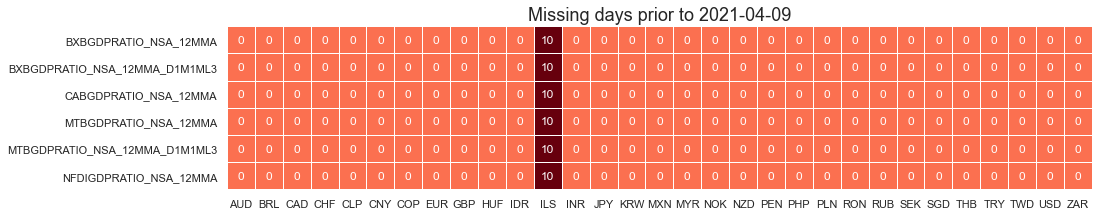

In [38]:
msm.check_availability(dfd, xcats=main, cids=cids_exp)

## Empirical features

### Merchandise trade and current account ratios

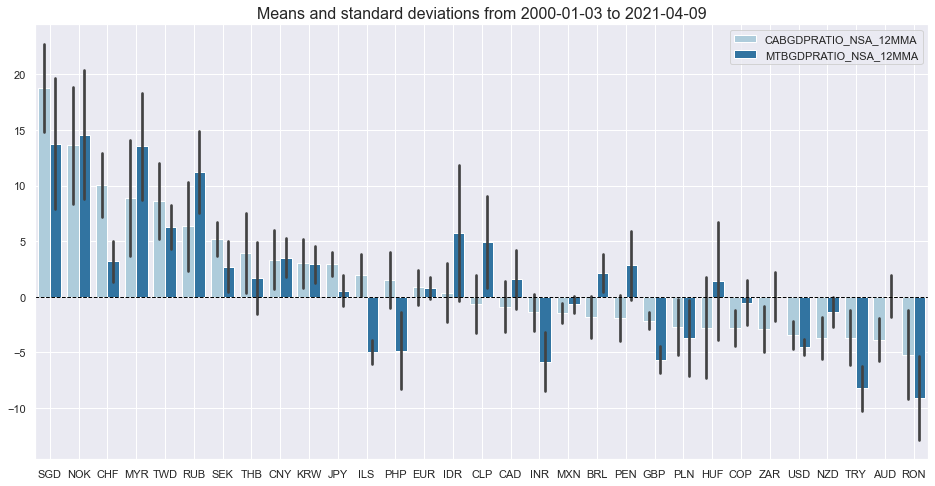

In [45]:
xcats_sel = ['CABGDPRATIO_NSA_12MMA', 'MTBGDPRATIO_NSA_12MMA'] 
msp.view_ranges(dfd, xcats=xcats_sel, cids=cids_exp, sort_cids_by='mean', start = '2000-01-01', 
            kind = 'bar', size=(16, 8))

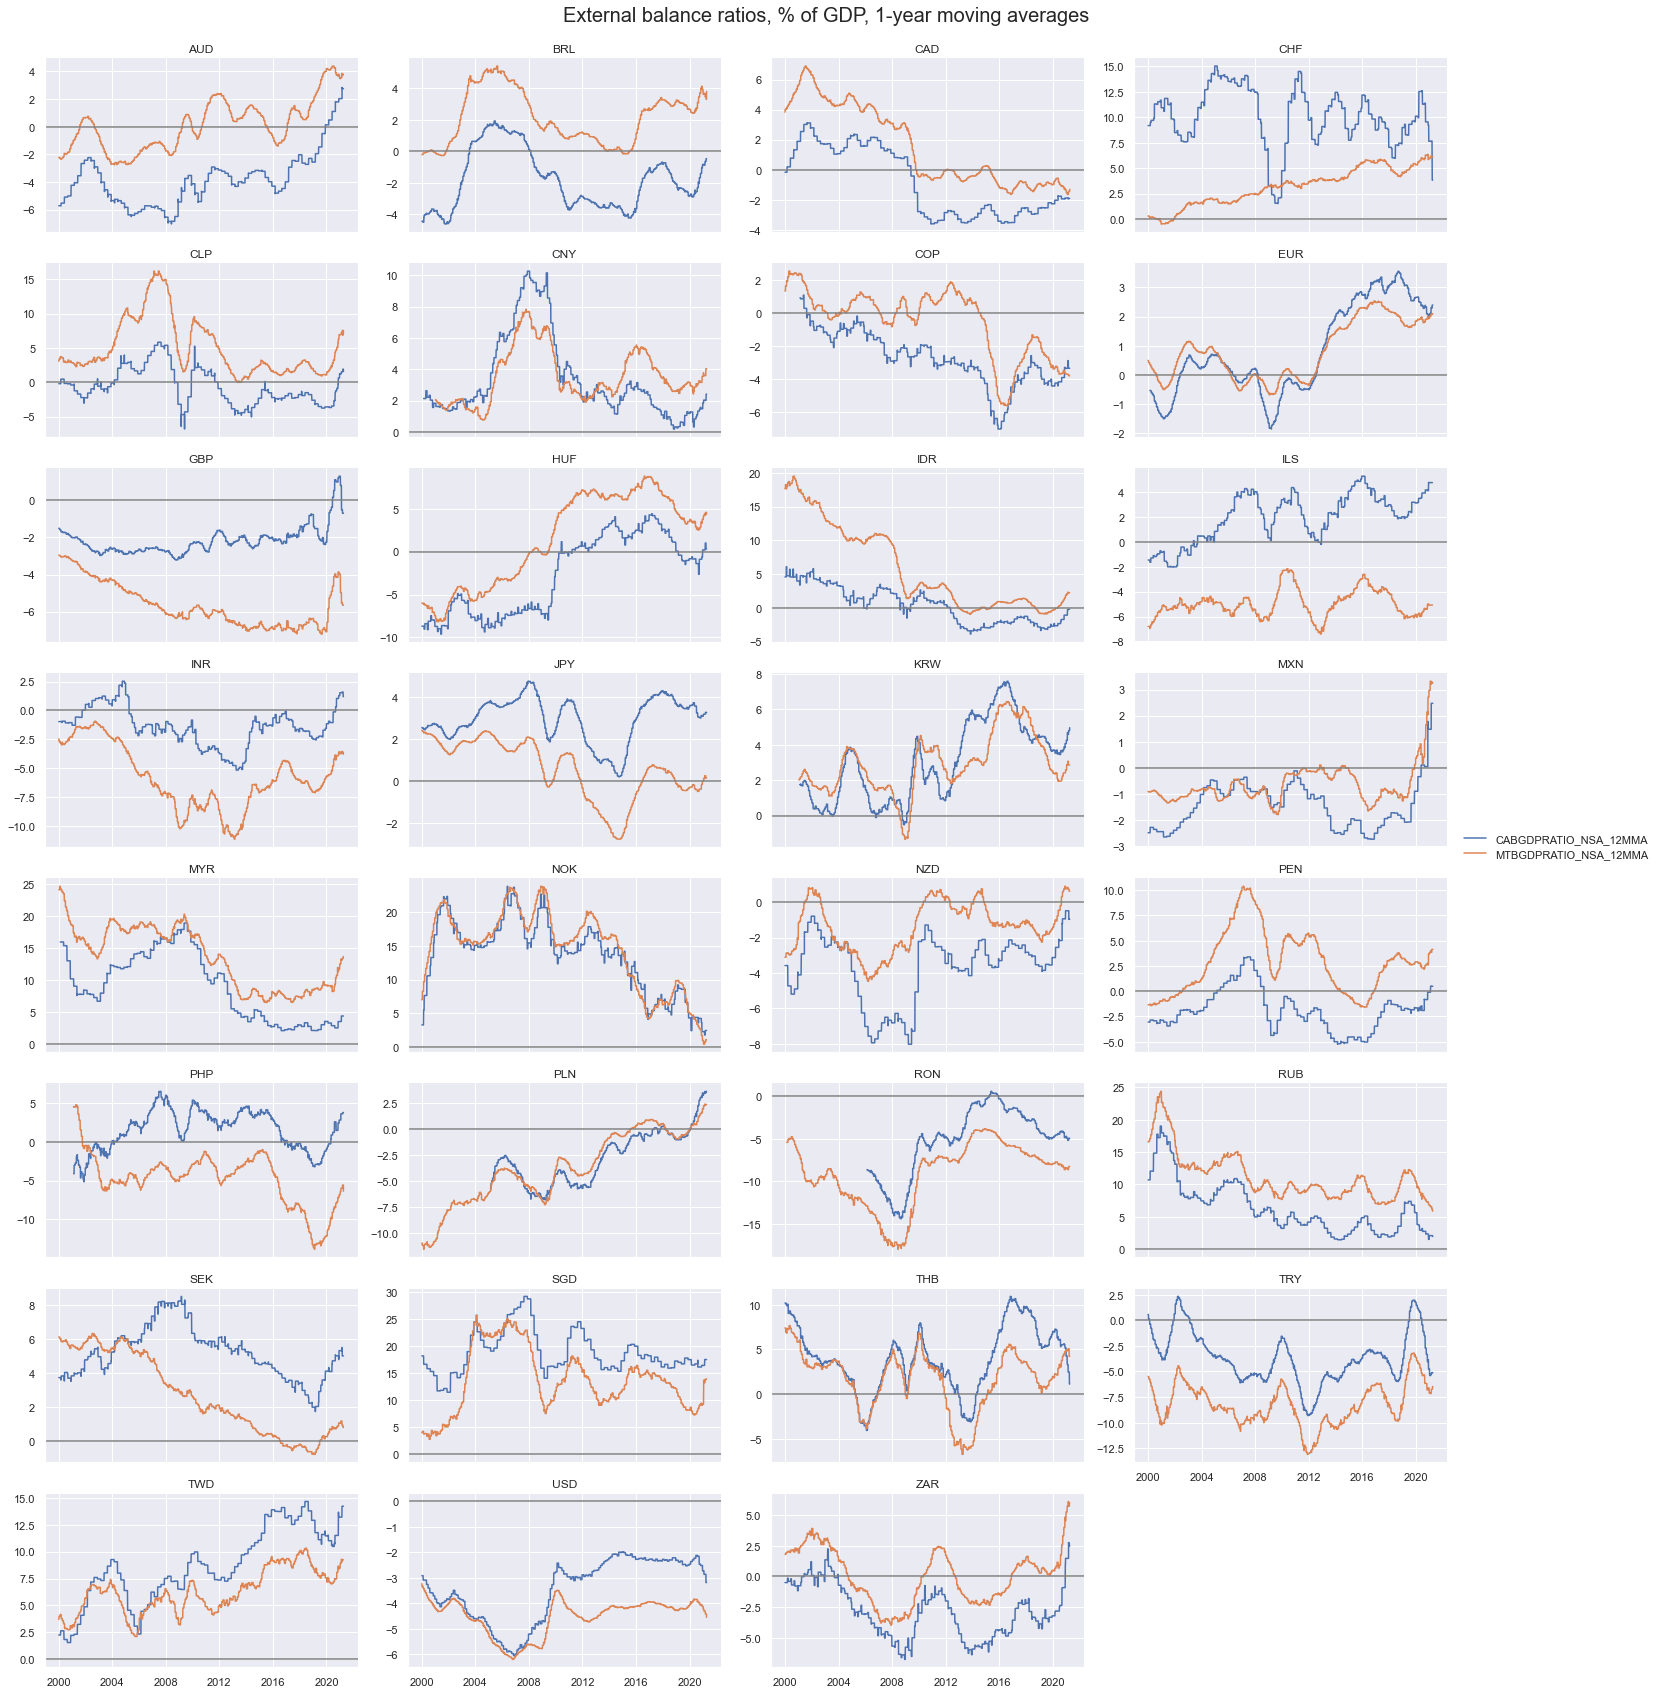

In [48]:
xcats_sel = ['CABGDPRATIO_NSA_12MMA', 'MTBGDPRATIO_NSA_12MMA'] 
msp.view_timelines(dfd, xcats=xcats_sel, cids=cids_exp, start='2000-01-01', 
                   title="External balance ratios, % of GDP, 1-year moving averages", 
                   ncol=4, same_y=False, size=(12, 7), aspect=1.7)

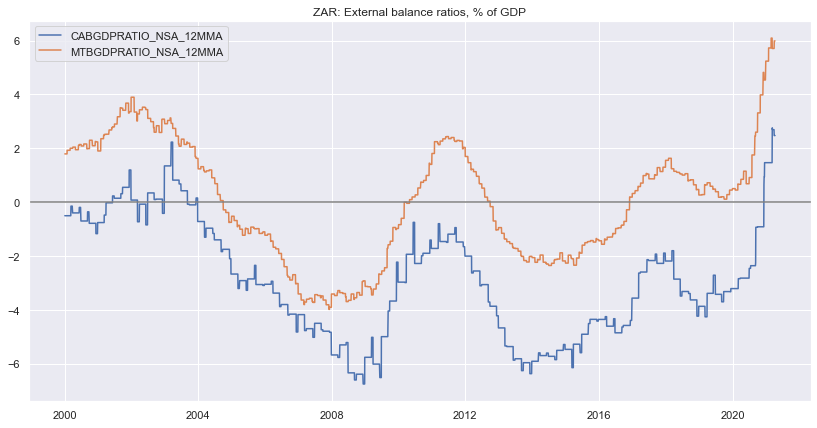

In [50]:
xcats_sel = ['CABGDPRATIO_NSA_12MMA', 'MTBGDPRATIO_NSA_12MMA'] 
cid_sel = 'ZAR'
msp.view_timelines(dfd, xcats=xcats_sel, cids=cid_sel, start='2000-01-01', 
                   title=f"{cid_sel}: External balance ratios, % of GDP", 
                   ncol=3, same_y=False, size=(14, 7))

Missing cross sections: ['ARS', 'DEM', 'ESP', 'FRF', 'HKD', 'ITL', 'NLG']


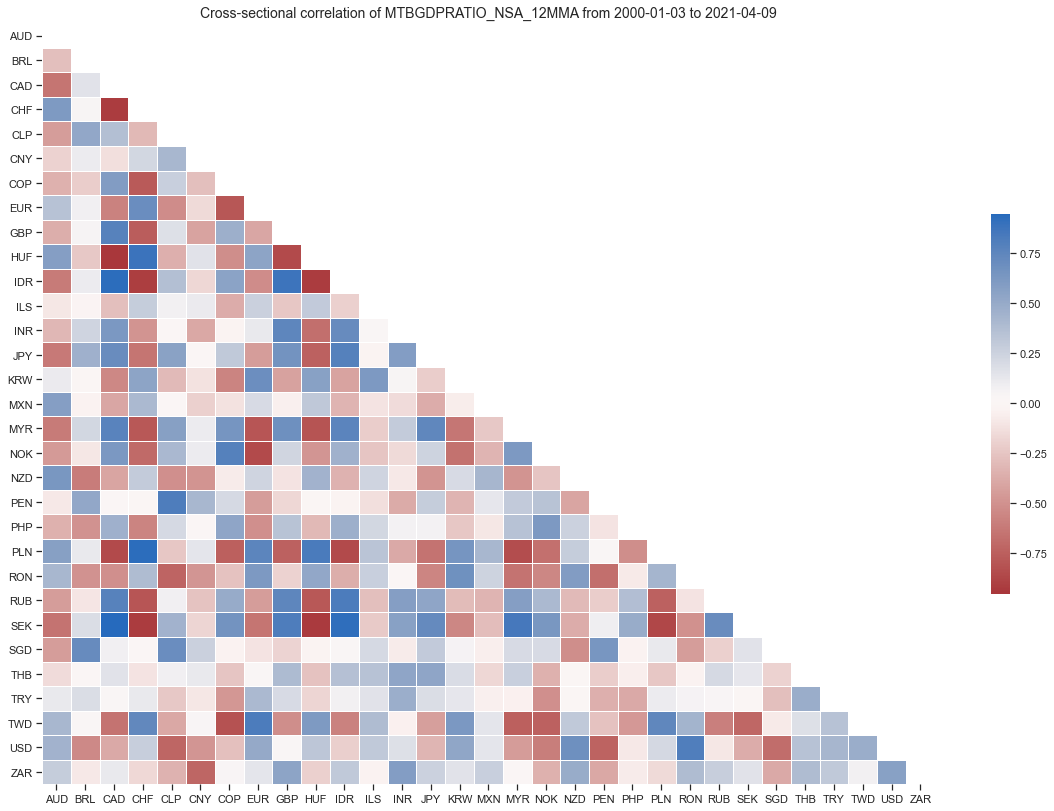

In [51]:
msp.correl_matrix(dfd, xcats='MTBGDPRATIO_NSA_12MMA', cids=cids, 
                  size = (20, 14))

## Significance for investors

In [74]:
cr = CategoryRelations(dfd, xcats['CABGDPRATIO_NSA_12MMA', 'FXCRR_NSA'], cids=cidx, 
                       freq='M', lag=0, xcat_aggs=['mean', 'mean'],
                       start='2000-01-01', years=10)

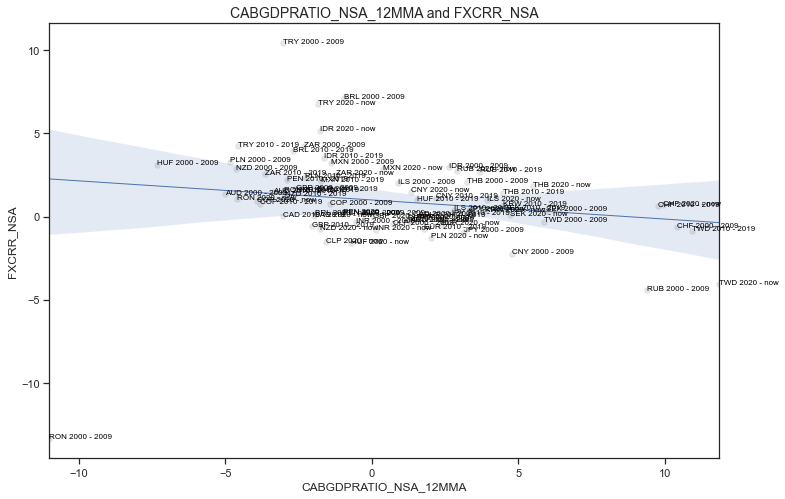

In [75]:
cr.reg_scatter(labels=True)

In [73]:
cr.ols_table()

                            OLS Regression Results                            
Dep. Variable:              FXCRR_NSA   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     2.977
Date:                Wed, 19 May 2021   Prob (F-statistic):             0.0883
Time:                        16:36:28   Log-Likelihood:                -194.11
No. Observations:                  81   AIC:                             392.2
Df Residuals:                      79   BIC:                             397.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.15

In [83]:
cidx = [c for c in cids_exp if c not in ['MYR', 'SGD', 'USD']]
cr_xr = msp.CategoryRelations(dfd, xcats=['CABGDPRATIO_NSA_12MMA', 'FXXR_NSA'], cids=cidx, 
                           freq='Q', lag=1, xcat_aggs=['mean', 'mean'],
                           start='2000-01-01')

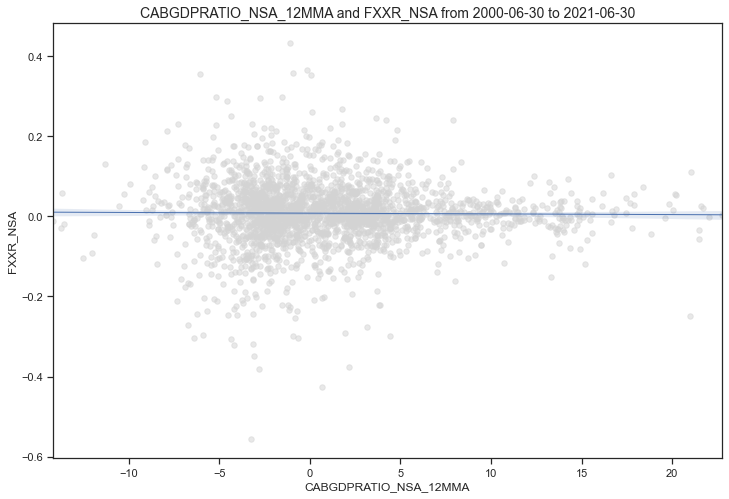

In [84]:
cr_xr.reg_scatter()

In [85]:
cr.ols_table()

                            OLS Regression Results                            
Dep. Variable:              FXCRR_NSA   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.592
Date:                Wed, 19 May 2021   Prob (F-statistic):              0.111
Time:                        18:04:32   Log-Likelihood:                -194.30
No. Observations:                  81   AIC:                             392.6
Df Residuals:                      79   BIC:                             397.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.99